In [124]:
import pandas as pd

Тест и попытка разобратся

In [125]:
train = pd.read_excel("train.xlsx")
train

,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300
...,...,...
395,2022-08-01,47500
396,2022-08-08,49000
397,2022-08-15,47500
398,2022-08-22,46500


In [126]:
test = pd.read_excel("test.xlsx")
test

,dt,Цена на арматуру
0,2022-09-05,46000
1,2022-09-12,46000
2,2022-09-19,46000
3,2022-09-26,45500
4,2022-10-03,45500
5,2022-10-10,45000
6,2022-10-17,44000
7,2022-10-24,43000
8,2022-10-31,42000
9,2022-11-07,41500


что-то както мало

In [127]:
# ch = pd.read_excel("Ch.xlsx")
# ch

In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   Цена на арматуру  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB


In [129]:
train.describe()

,dt,Цена на арматуру
count,400,400.000000
mean,2018-11-01 12:00:00,39229.475000
min,2015-01-05 00:00:00,21000.000000
25%,2016-12-03 06:00:00,31075.000000
50%,2018-11-01 12:00:00,35450.000000
75%,2020-09-29 18:00:00,42000.000000
max,2022-08-29 00:00:00,79000.000000
std,NaN,13407.979668


In [130]:
train

,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300
...,...,...
395,2022-08-01,47500
396,2022-08-08,49000
397,2022-08-15,47500
398,2022-08-22,46500


In [131]:
import matplotlib.pyplot as plt

In [132]:
train[:3]

,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000


<Axes: title={'center': 'Time series'}, xlabel='dt', ylabel=' '>

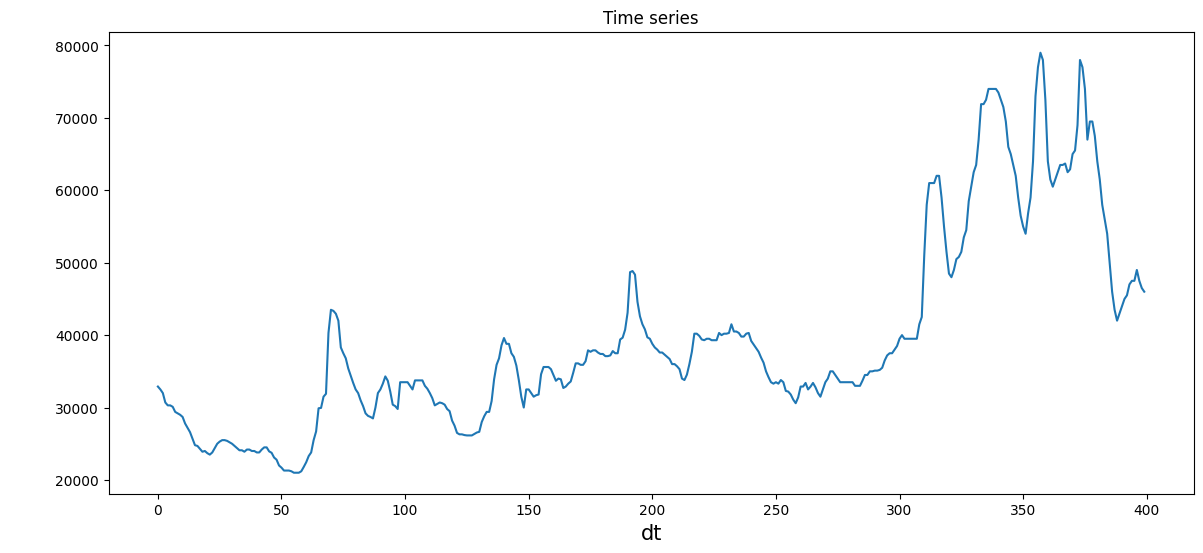

In [133]:
plt.figure(figsize=(14, 6))
plt.title('Time series')
plt.xlabel('dt', fontsize=15)
plt.ylabel(' ', rotation=0, labelpad=30, fontsize=15)
train['Цена на арматуру'].plot()

<Axes: title={'center': 'Residual'}>

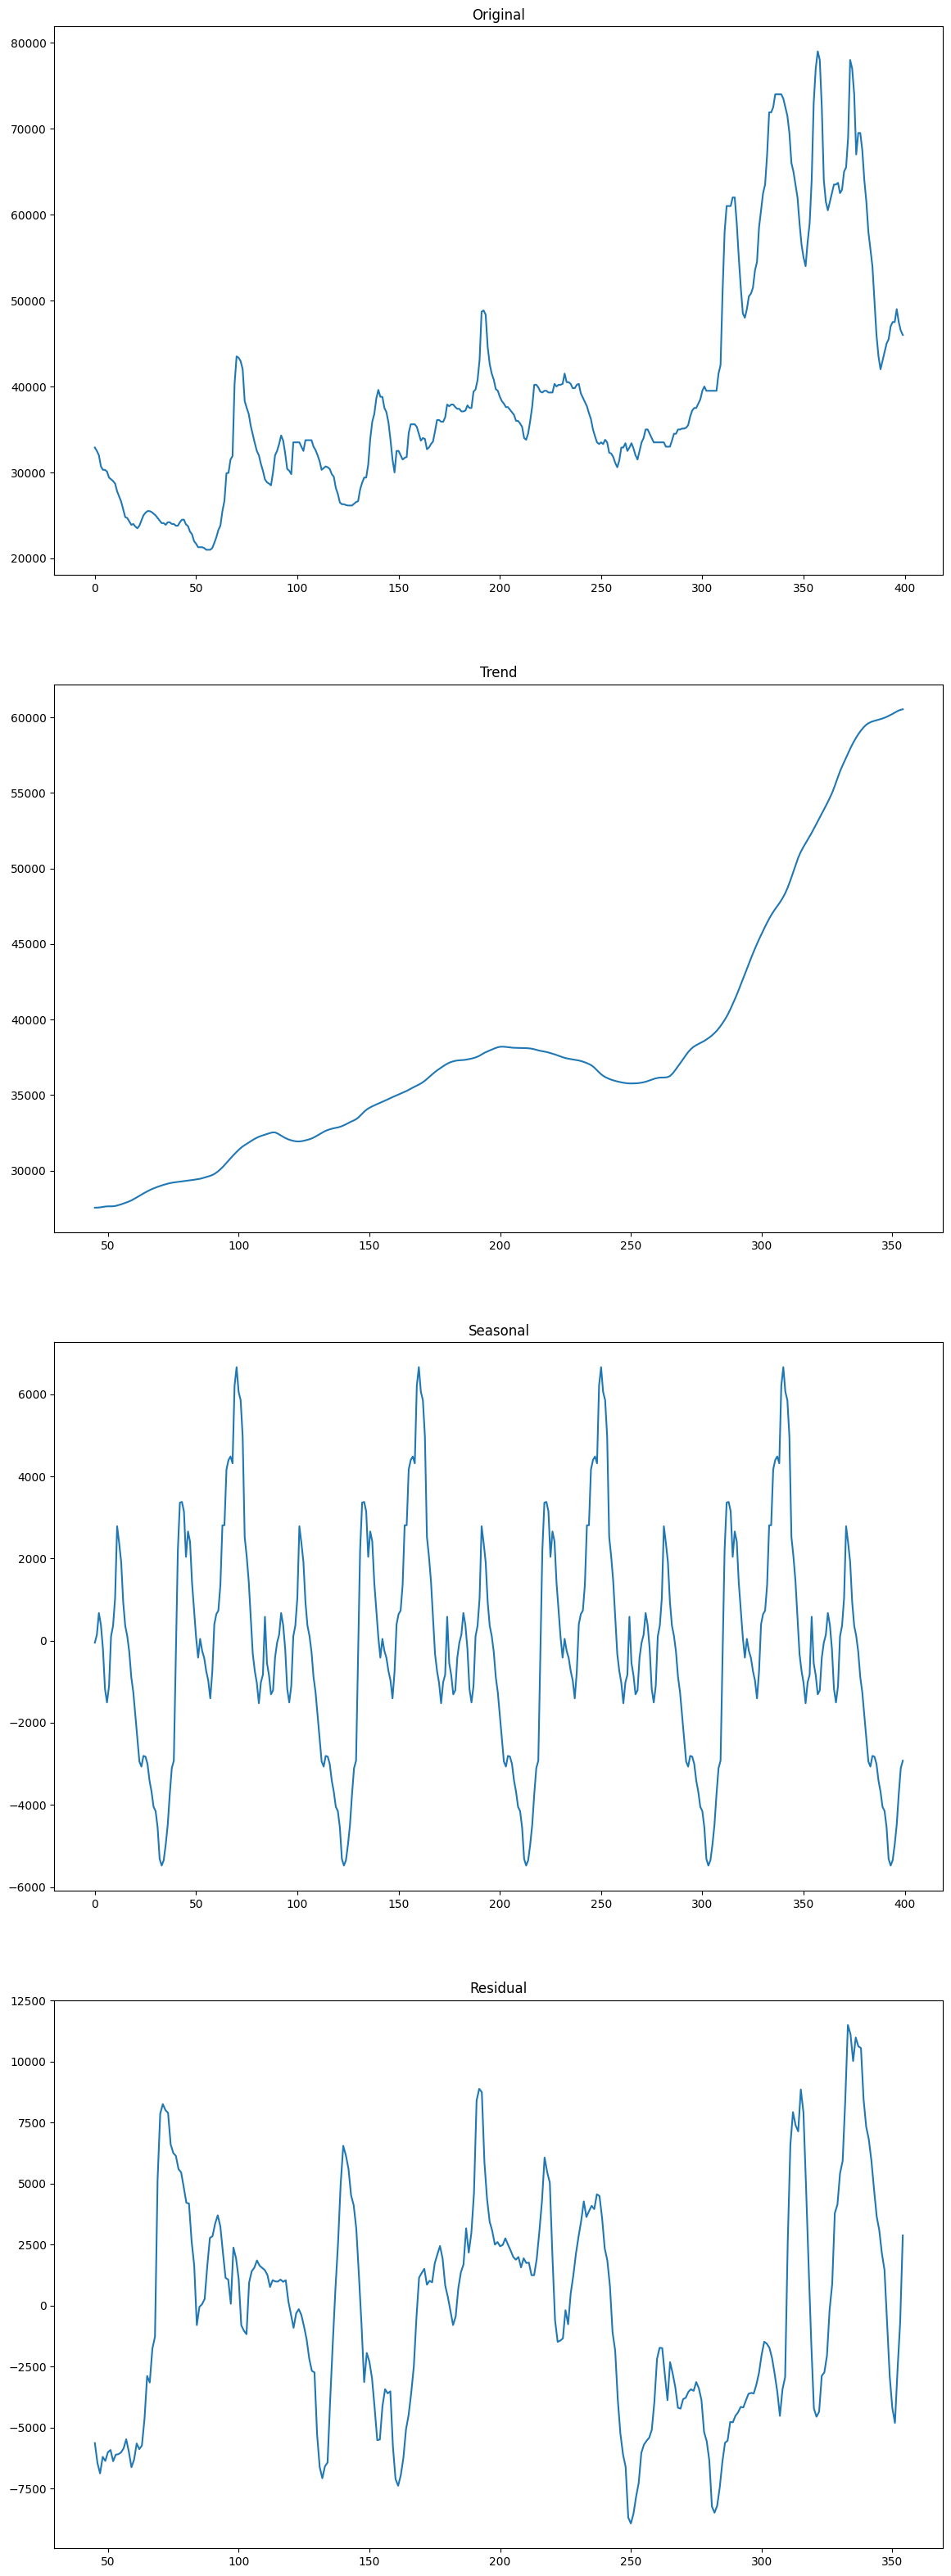

In [134]:
from statsmodels.tsa.seasonal import seasonal_decompose
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 40))
decompose = seasonal_decompose(train[['Цена на арматуру']], period=90)

ax[0].set_title('Original')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal')
ax[3].set_title('Residual')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3])

In [135]:
df_train = train["Цена на арматуру"].iloc[:400]
df_test = test["Цена на арматуру"].iloc[:27]
print(f"Длина df_test: {len(df_test)}")

Длина df_test: 27


In [136]:
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

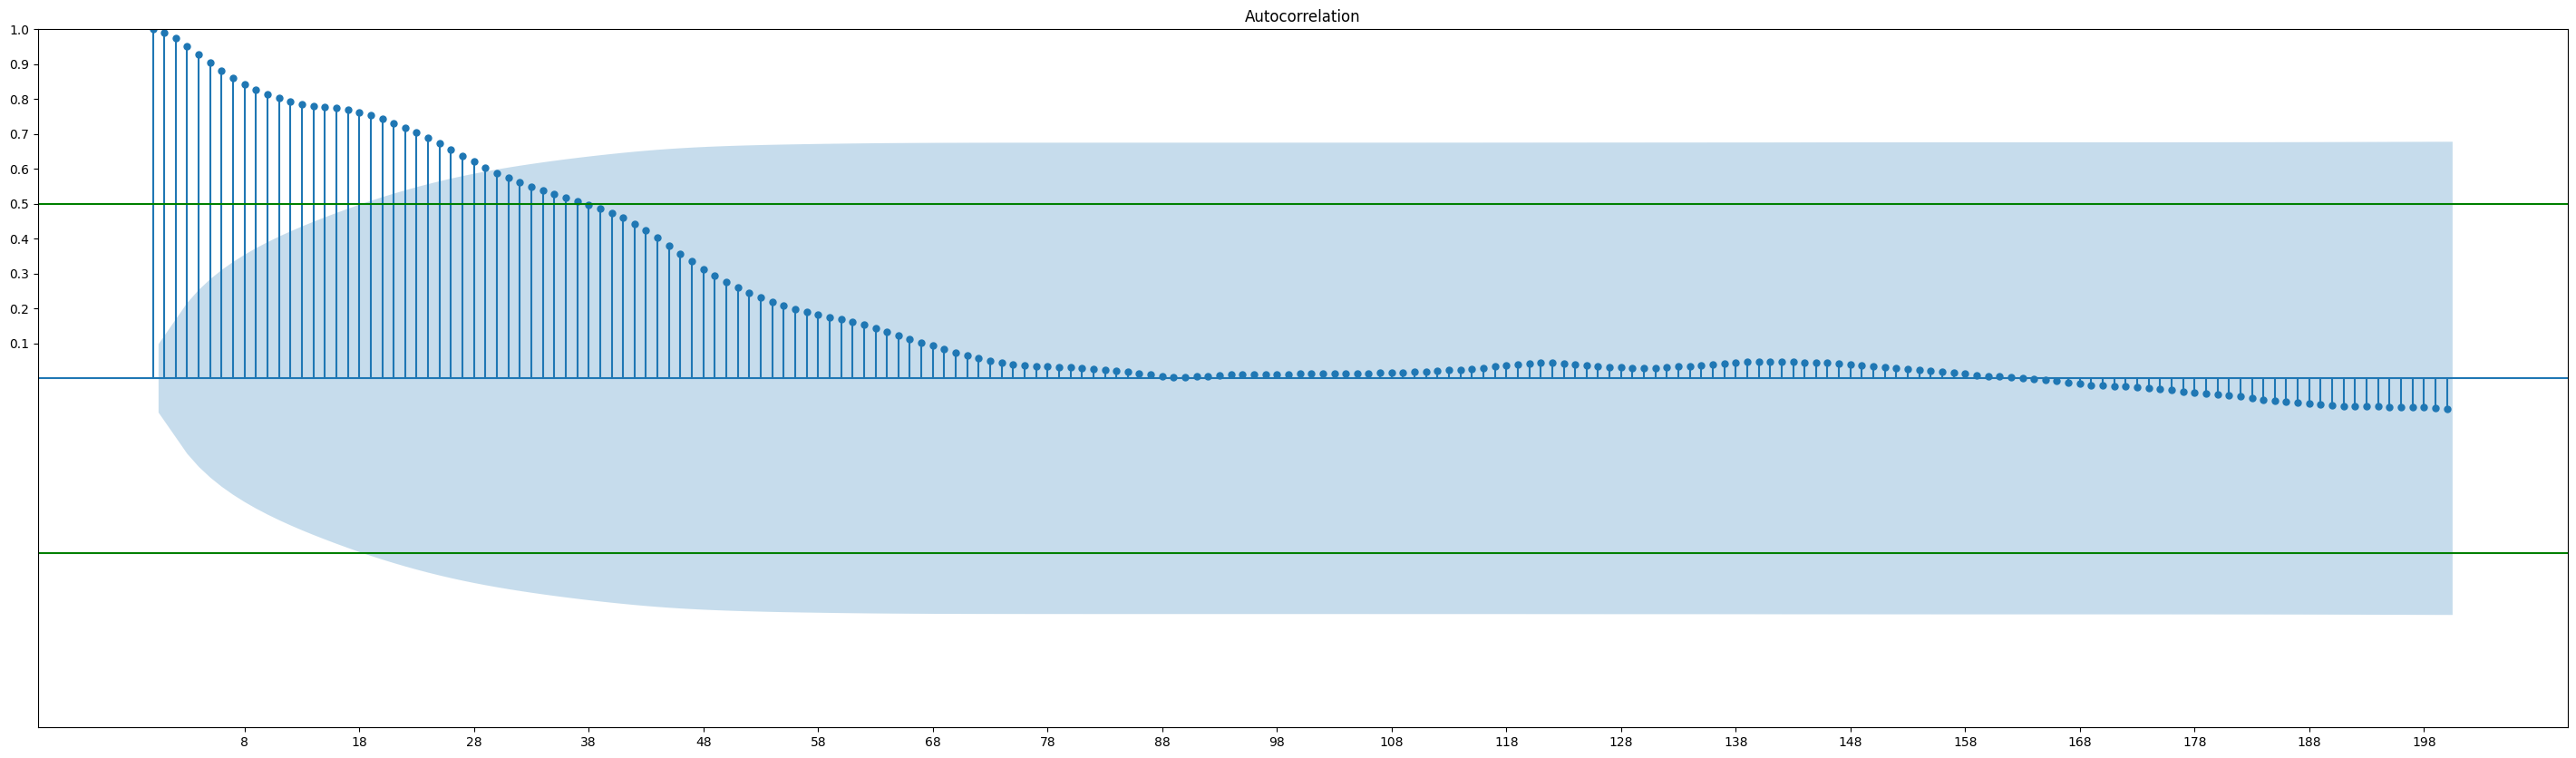

In [137]:
fig, ax = plt.subplots(figsize=(36,10))
plot_acf(train['Цена на арматуру'], lags=200, ax=ax)
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(8, 201, 10))
plt.axhline(y=0.5, color="green")
plt.axhline(y=-0.5, color="green")
plt.show()

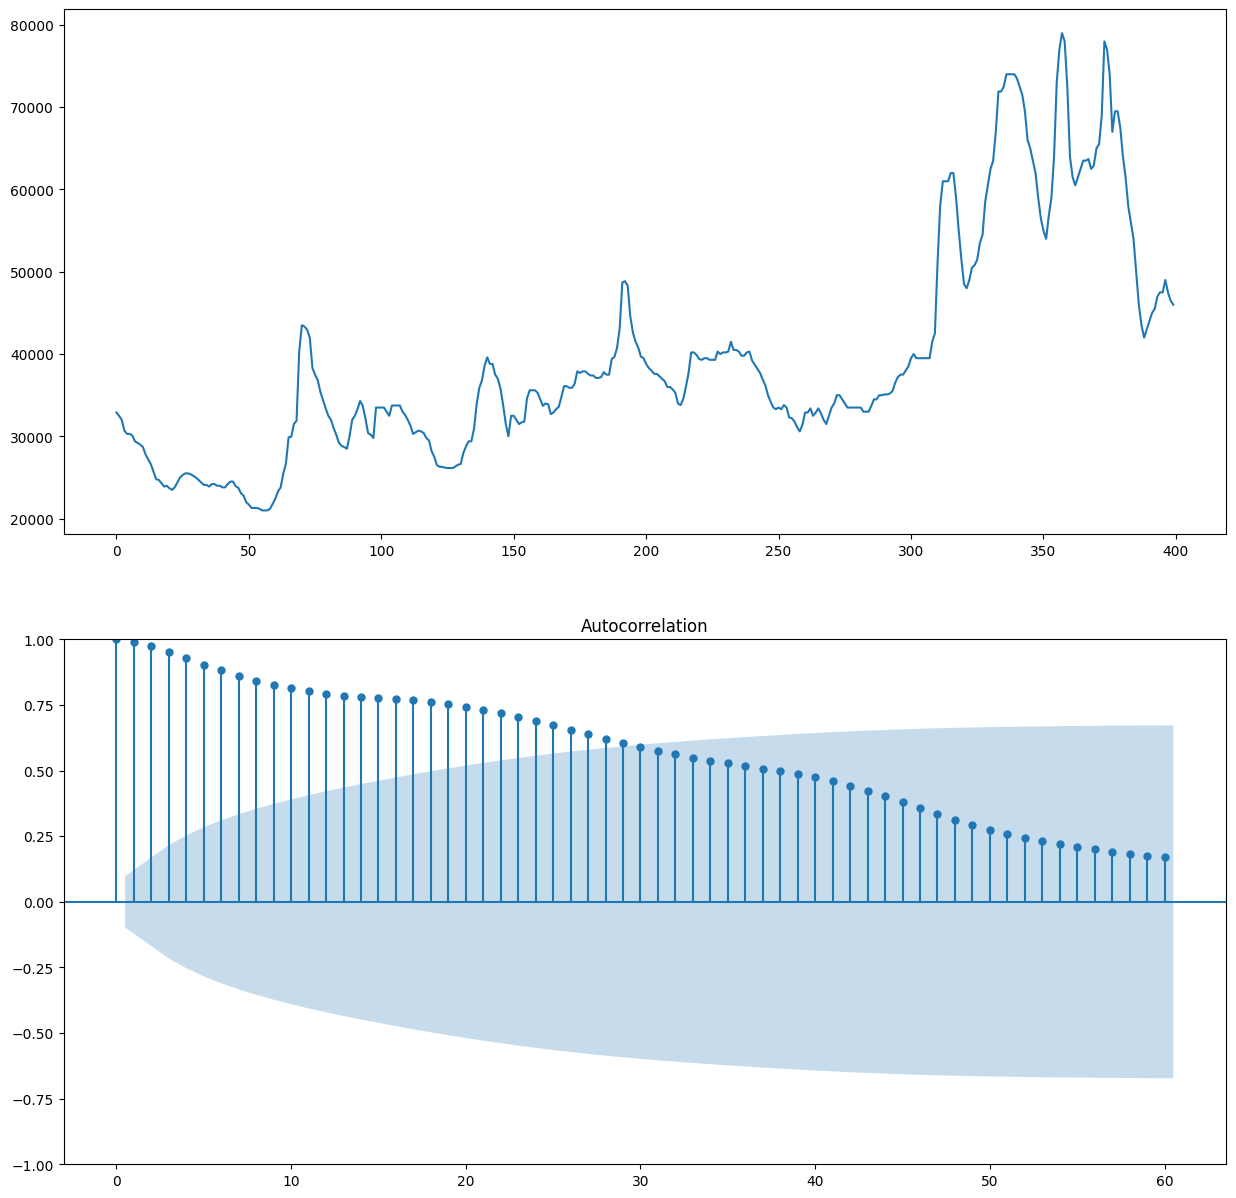

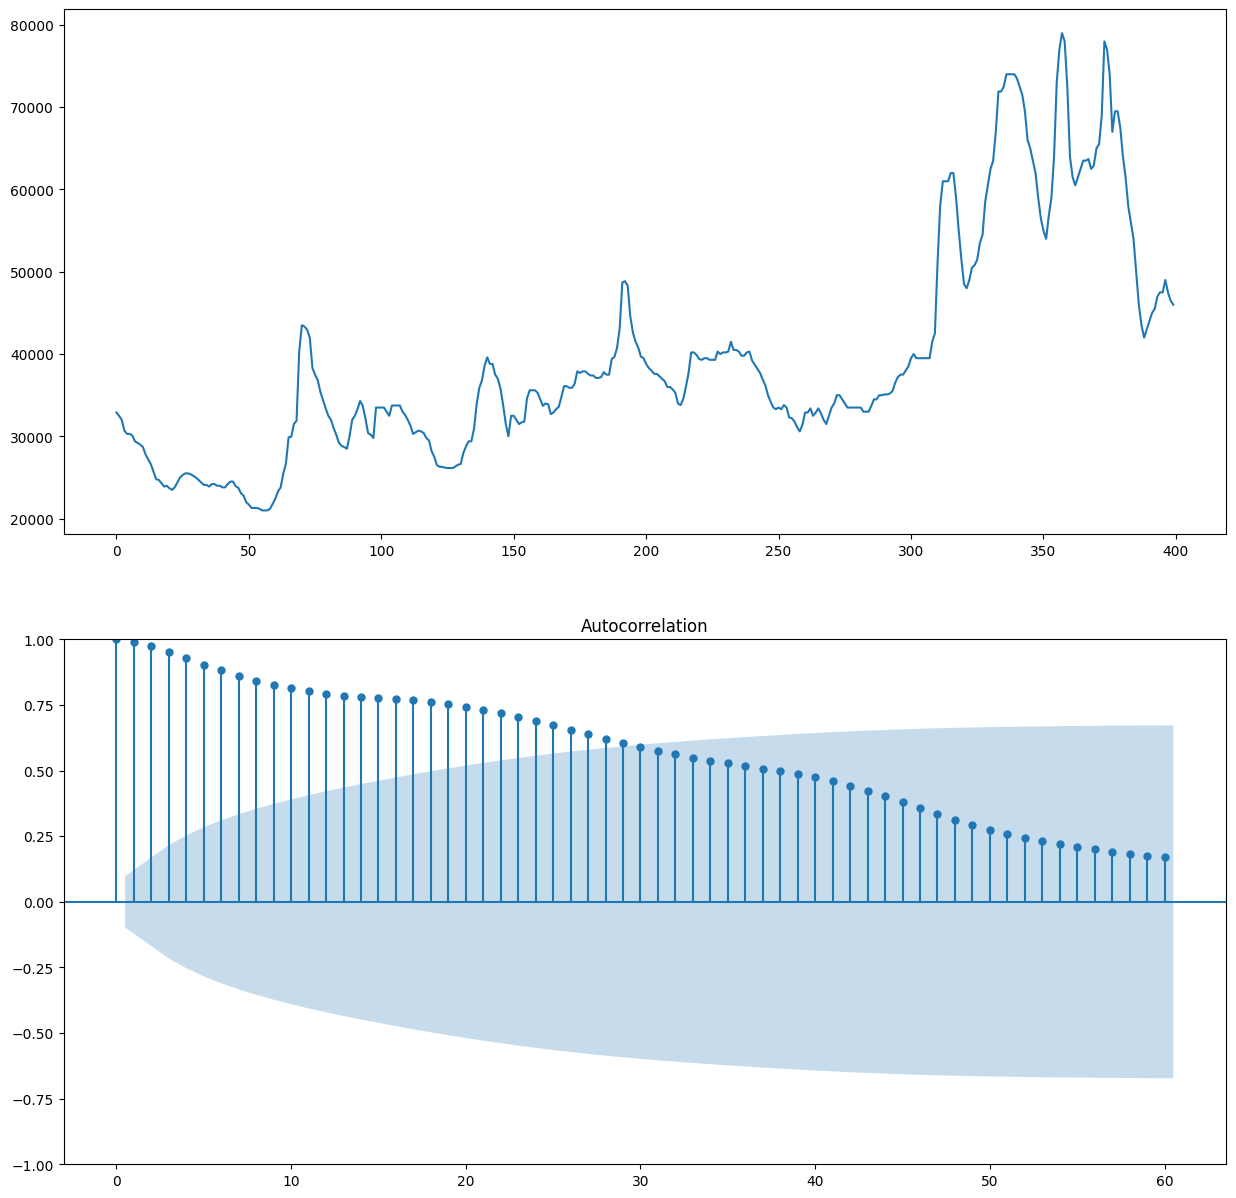

In [138]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
train['Цена на арматуру'].plot(ax=ax[0])
plot_acf(train['Цена на арматуру'], lags=60, ax=ax[1])

In [139]:
print(train.head())
print(train.describe())

          dt  Цена на арматуру
0 2015-01-05             32900
1 2015-01-12             32500
2 2015-01-19             32000
3 2015-01-26             30700
4 2015-02-02             30300
                        dt  Цена на арматуру
count                  400        400.000000
mean   2018-11-01 12:00:00      39229.475000
min    2015-01-05 00:00:00      21000.000000
25%    2016-12-03 06:00:00      31075.000000
50%    2018-11-01 12:00:00      35450.000000
75%    2020-09-29 18:00:00      42000.000000
max    2022-08-29 00:00:00      79000.000000
std                    NaN      13407.979668


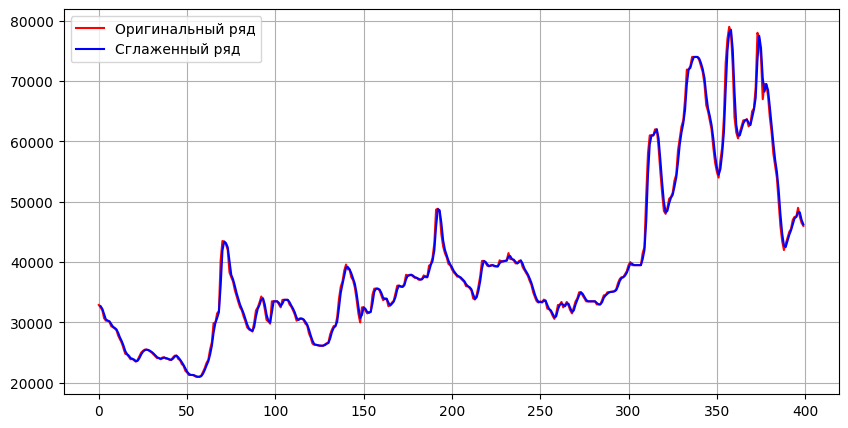

In [140]:
train['Скользящее_среднее'] = train['Цена на арматуру'].rolling(window=2).mean()

plt.figure(figsize=(10, 5))
plt.plot(train['Цена на арматуру'], label='Оригинальный ряд', color='red')
plt.plot(train['Скользящее_среднее'], label='Сглаженный ряд', color='blue')
plt.legend()
plt.grid(True)
plt.show()


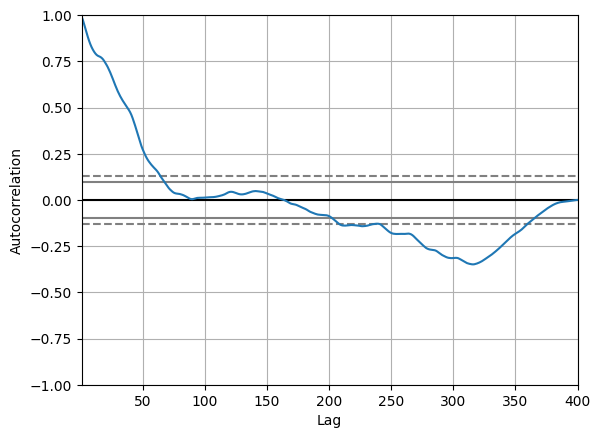

In [141]:
pd.plotting.autocorrelation_plot(train['Цена на арматуру'])
plt.show()


In [142]:

train.dropna()
test.dropna()
print(train.head())
print(train.describe())

          dt  Цена на арматуру  Скользящее_среднее
0 2015-01-05             32900                 NaN
1 2015-01-12             32500             32700.0
2 2015-01-19             32000             32250.0
3 2015-01-26             30700             31350.0
4 2015-02-02             30300             30500.0
                        dt  Цена на арматуру  Скользящее_среднее
count                  400        400.000000          399.000000
mean   2018-11-01 12:00:00      39229.475000        39228.922306
min    2015-01-05 00:00:00      21000.000000        21000.000000
25%    2016-12-03 06:00:00      31075.000000        31125.000000
50%    2018-11-01 12:00:00      35450.000000        35450.000000
75%    2020-09-29 18:00:00      42000.000000        41962.500000
max    2022-08-29 00:00:00      79000.000000        78500.000000
std                    NaN      13407.979668        13393.845553


c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


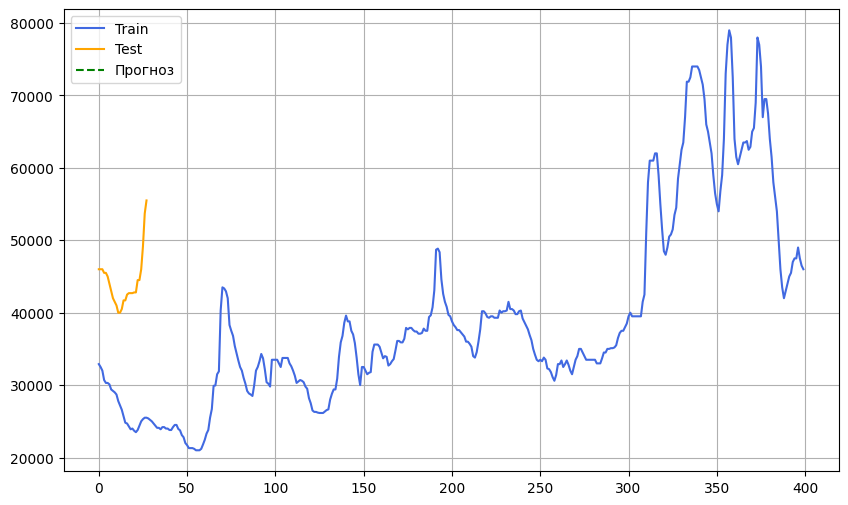

ValueError: Input contains NaN.

In [144]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

test['Цена на арматуру'] = pd.to_numeric(test['Цена на арматуру'], errors='coerce')
test['Цена на арматуру'] = pd.to_numeric(test['Цена на арматуру'], errors='coerce')


# Обучаем модель на train
model = ExponentialSmoothing(train['Цена на арматуру'], trend='add', seasonal=None)
fit = model.fit()

# Делаем прогноз на тестовый период
test['Прогноз'] = fit.forecast(len(test))

# Рисуем оригинал и прогноз
plt.figure(figsize=(10, 6))
plt.plot(train['Цена на арматуру'], label='Train', color='royalblue')
plt.plot(test['Цена на арматуру'], label='Test', color='orange')
plt.plot(test['Прогноз'], label='Прогноз', color='green', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test['Цена на арматуру'], test['Прогноз'])
rmse = np.sqrt(mean_squared_error(test['Цена на арматуру'], test['Прогноз']))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

mae = mean_absolute_error(test['Цена на арматуру'], test['Цена на арматуру'])
rmse = np.sqrt(mean_squared_error(test['Цена на арматуру'], test['Прогноз']))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

In [145]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.ar_model import AutoReg

In [146]:

model = AutoReg(df_train, lags=19).fit()
forecasts = model.forecast(steps=27).tolist()
test_values = df_test.tolist()

print(r2_score(test_values, forecasts))

-0.1155579038754837


In [147]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(df_test, forecasts)
mse = mean_squared_error(df_test, forecasts)
rmse = mse**0.5

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 2320.138514320391
MSE: 9406218.977640467
RMSE: 3066.955979084223


In [ ]:
print(df_train.head())  # Проверка первых строк обучающих данных
print(df_test.head())   # Проверка первых строк тестовых данных
print(df_train.isnull().sum())  # Проверка на пропуски
print(df_test.isnull().sum())

0    32900
1    32500
2    32000
3    30700
4    30300
Name: Цена на арматуру, dtype: int64
0    46000
1    46000
2    46000
3    45500
4    45500
Name: Цена на арматуру, dtype: int64
0
0


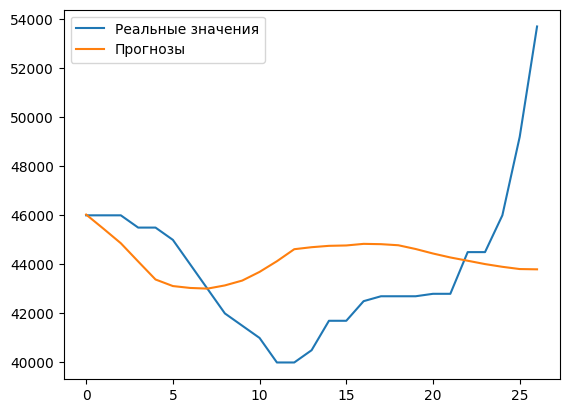

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_test.index, df_test, label="Реальные значения")
plt.plot(df_test.index, forecasts, label="Прогнозы")
plt.legend()
plt.show()

У меня все плохо 

вахвваххв все плохо но тут я ниче не сделал просто кратенько так пройтись надо было

сделано для того чтобы просто посмотреть этапы и попытатся разобратся со всеми
